In [6]:
from pandas import Series

series = Series.from_csv('robberies.csv', header=0)
split_point = len(series) - 12
dataset, validation = series[:split_point], series[split_point:]
print("dataset: %d\tvalidation: %d" % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

dataset: 106	validation: 12


In [10]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt

series = Series.from_csv('dataset.csv')
X = series.values
X = X.astype('float32')
train_size = int(len(X)*0.5)
train,test = X[:train_size], X[train_size:]

history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

In [11]:
from pandas import Series

series = Series.from_csv('dataset.csv')
print(series.describe())

count    106.000000
mean     173.103774
std      112.231133
min       29.000000
25%       74.750000
50%      144.500000
75%      271.750000
max      487.000000
dtype: float64


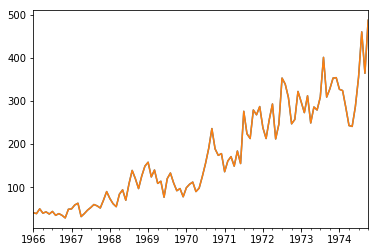

In [14]:
# 线图
from pandas import Series
from matplotlib import pyplot as plt

series = Series.from_csv('dataset.csv')
series.plot()
plt.show()

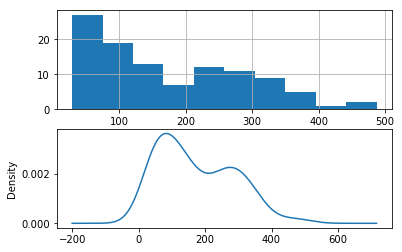

In [16]:
# 密度图
from pandas import Series
from matplotlib import pyplot as plt

series = Series.from_csv('dataset.csv')
plt.figure(1)
plt.subplot(211)
series.hist()
plt.subplot(212)
series.plot(kind='kde')
plt.show()

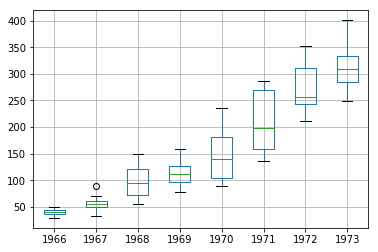

In [6]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot as plt

series = Series.from_csv('dataset.csv')
groups = series['1966':'1973'].groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
plt.show()

ADF Statistic: -3.980946
p-value: 0.001514
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584


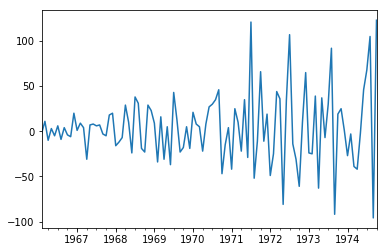

In [8]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt

# create a differe
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return Series(diff)

series = Series.from_csv('dataset.csv')
X = series.values
# difference data
stationary = difference(X)
stationary.index = series.index[1:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary.csv')
stationary.plot()
plt.show()

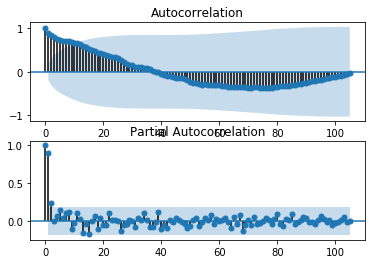

In [9]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
series = Series.from_csv('dataset.csv')
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show()

In [10]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# predict
	model = ARIMA(history, order=(0,1,2))
	model_fit = model.fit(disp=0)
	yhat = model_fit.forecast()[0]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=102.710, Expected=125
>Predicted=118.868, Expected=155
>Predicted=141.099, Expected=190
>Predicted=176.593, Expected=236
>Predicted=233.418, Expected=189
>Predicted=186.905, Expected=174
>Predicted=184.846, Expected=178
>Predicted=183.763, Expected=136
>Predicted=146.180, Expected=161
>Predicted=171.279, Expected=171
>Predicted=170.196, Expected=149
>Predicted=154.425, Expected=184
>Predicted=185.707, Expected=155
>Predicted=157.284, Expected=276
>Predicted=245.280, Expected=224
>Predicted=222.242, Expected=213
>Predicted=219.698, Expected=279
>Predicted=261.506, Expected=268
>Predicted=264.287, Expected=287
>Predicted=282.759, Expected=238
>Predicted=255.843, Expected=213
>Predicted=235.189, Expected=257
>Predicted=257.622, Expected=293
>Predicted=280.345, Expected=212
>Predicted=235.564, Expected=246
>Predicted=255.342, Expected=353
>Predicted=318.613, Expected=339
>Predicted=310.335, Expected=308
>Predicted=306.789, Expected=247
>Predicted=270.213, Expected=257
>Predicted

In [ ]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# load dataset
series = Series.from_csv('dataset.csv')
# evaluate parameters
p_values = range(0,13)
d_values = range(0, 4)
q_values = range(0, 13)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=154.962
ARIMA(0, 0, 1) MSE=99.360
ARIMA(0, 1, 0) MSE=51.827
ARIMA(0, 1, 1) MSE=50.417
ARIMA(0, 1, 2) MSE=49.821
ARIMA(0, 2, 0) MSE=80.804
ARIMA(0, 2, 1) MSE=52.456
ARIMA(1, 0, 0) MSE=53.243
ARIMA(1, 1, 0) MSE=50.582
ARIMA(1, 2, 0) MSE=68.672
